In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay, classification_report
)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
plt.rcParams['figure.figsize'] = (7, 5)


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')  # 0 = malignant, 1 = benign

X.sample(5, random_state=RANDOM_STATE)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [2]:
#1. Guion EDA
# Unir en un solo DataFrame
df = pd.concat([X, y], axis=1)
print("\nDimensiones iniciales: ", df.shape)
print("\nPrimeras líneas")
df.head()
print("\nInformación")
df.info()
print("\nEstadísticos")
df.describe()



Dimensiones iniciales:  (569, 31)

Primeras líneas

Información
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error     

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


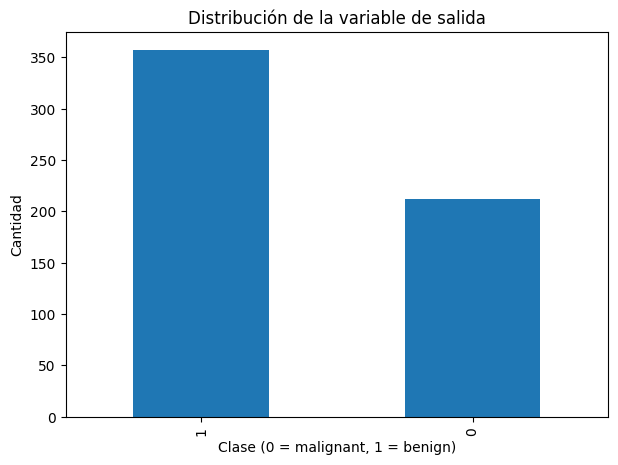

In [3]:
y.value_counts().plot(kind='bar')
plt.xlabel('Clase (0 = malignant, 1 = benign)')
plt.ylabel('Cantidad')
plt.title('Distribución de la variable de salida')
plt.show()

In [4]:
import numpy as np

correlations = df.corr()["target"].drop("target").abs().sort_values(ascending=False)
top_features = correlations.head(8).index.tolist()
print(top_features)

['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area']


In [5]:
# =========================================================
# Comparación de alternativas de reducción de variables (EDA)
# Breast Cancer (sklearn)
# =========================================================
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

RANDOM_STATE = 42
N_FEATURES = 8            # número de variables objetivo para métodos 1-3
REDUNDANCY_THRESH = 0.85  # umbral de correlación entre features para método 3
N_SPLITS = 5              # CV
SCORING = ["accuracy", "roc_auc"]

# -----------------------------
# 0) Cargar datos y DataFrame
# -----------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")
df = pd.concat([X, y], axis=1)

# ------------------------------------------------
# 1) Selección por correlación con el target (Top-K)
# ------------------------------------------------
def select_by_target_correlation(df, target_col="target", k=N_FEATURES):
    corrs = df.corr(numeric_only=True)[target_col].drop(target_col).abs()
    return corrs.sort_values(ascending=False).head(k).index.tolist()

# ------------------------------------------------
# 2) Importancias con Random Forest (Top-K)
# ------------------------------------------------
def select_by_rf_importance(X, y, k=N_FEATURES, random_state=RANDOM_STATE):
    rf = RandomForestClassifier(random_state=random_state, n_estimators=300, n_jobs=-1)
    rf.fit(X, y)
    imps = pd.Series(rf.feature_importances_, index=X.columns)
    return imps.sort_values(ascending=False).head(k).index.tolist(), imps

# ------------------------------------------------
# 3) Greedy: Top por correlación con target y
#    eliminar redundancia con corr(feature_i, feature_j)
# ------------------------------------------------
def greedy_non_redundant(df, target_col="target", k=N_FEATURES, redundancy_thresh=REDUNDANCY_THRESH):
    # ranking por |corr| con el target
    target_corr = df.corr(numeric_only=True)[target_col].drop(target_col).abs().sort_values(ascending=False)
    candidates = target_corr.index.tolist()
    corr_matrix = df.drop(columns=[target_col]).corr()

    selected = []
    for feat in candidates:
        if len(selected) == 0:
            selected.append(feat)
        else:
            # comprobar redundancia con lo ya seleccionado
            redundant = any(abs(corr_matrix.loc[feat, s]) >= redundancy_thresh for s in selected)
            if not redundant:
                selected.append(feat)
        if len(selected) >= k:
            break
    return selected

# ------------------------------------------------
# 4) PCA (reducción a componentes principales)
# ------------------------------------------------
def fit_pca(X, n_components=N_FEATURES, random_state=RANDOM_STATE):
    pca = PCA(n_components=n_components, random_state=random_state)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

# ------------------------------------------------
# Evaluación con CV para comparar alternativas
# ------------------------------------------------
def evaluate_subset(X, y, features=None, use_pca=False, n_components=N_FEATURES, random_state=RANDOM_STATE):
    cv = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=random_state)
    results = {}

    # Modelos base
    lr_pipe = Pipeline([
        ("scaler", StandardScaler(with_mean=True, with_std=True)),
        ("lr", LogisticRegression(max_iter=2000, random_state=random_state))
    ])
    rf = RandomForestClassifier(random_state=random_state, n_estimators=300, n_jobs=-1)

    if use_pca:
        # PCA + LR / RF
        pca = PCA(n_components=n_components, random_state=random_state)
        lr_pca = Pipeline([("scaler", StandardScaler()), ("pca", pca), ("lr", LogisticRegression(max_iter=2000, random_state=random_state))])
        rf_pca = Pipeline([("pca", pca), ("rf", RandomForestClassifier(random_state=random_state, n_estimators=300, n_jobs=-1))])

        for name, model in [("LR (PCA)", lr_pca), ("RF (PCA)", rf_pca)]:
            scores = {m: cross_val_score(model, X, y, cv=cv, scoring=m).mean() for m in SCORING}
            results[name] = scores
        return pd.DataFrame(results).T

    # Si NO es PCA, subset de columnas
    X_sub = X[features]

    for name, model in [("LR", lr_pipe), ("RF", rf)]:
        scores = {m: cross_val_score(model, X_sub, y, cv=cv, scoring=m).mean() for m in SCORING}
        results[name] = scores

    return pd.DataFrame(results).T

# =================================================
# Ejecutar selección/reducción y comparar resultados
# =================================================
# 1) Correlación con target
sel_corr = select_by_target_correlation(df, "target", N_FEATURES)

# 2) Importancias RF
sel_rf, rf_importances = select_by_rf_importance(X, y, N_FEATURES, RANDOM_STATE)

# 3) Greedy no redundante
sel_greedy = greedy_non_redundant(df, "target", N_FEATURES, REDUNDANCY_THRESH)

# 4) PCA
pca, X_pca = fit_pca(X, N_FEATURES, RANDOM_STATE)

# ----------------------------
# Mostrar selección de features
# ----------------------------
print("=== 1) Top correlación con target ===")
print(sel_corr, "\n")

print("=== 2) Top importancias RF ===")
print(sel_rf, "\n")

print("=== 3) Greedy no redundante (umbral corr = {:.2f}) ===".format(REDUNDANCY_THRESH))
print(sel_greedy, "\n")

print("=== 4) PCA ===")
print(f"Componentes: {N_FEATURES} | Varianza explicada acumulada: {pca.explained_variance_ratio_.sum():.3f}")
print("Varianza por componente:", np.round(pca.explained_variance_ratio_, 3), "\n")

# ---------------------------------------------
# Evaluación comparativa (Accuracy y ROC-AUC)
# ---------------------------------------------
print("=== Evaluación CV (LR y RF) - Subsets ===")
res_corr = evaluate_subset(X, y, features=sel_corr, use_pca=False)
res_rf   = evaluate_subset(X, y, features=sel_rf,   use_pca=False)
res_gre  = evaluate_subset(X, y, features=sel_greedy, use_pca=False)
res_pca  = evaluate_subset(X, y, use_pca=True, n_components=N_FEATURES)

summary = pd.concat({
    "TopCorr": res_corr,
    "TopRF":   res_rf,
    "GreedyNR":res_gre,
    "PCA":     res_pca
}, axis=0)

print("\n=== Resumen comparativo (media CV, n_splits = {}) ===".format(N_SPLITS))
print(summary)

# ---------------------------------------------
# (Opcional) Mirar solapamientos entre métodos
# ---------------------------------------------
def overlap(a, b):
    return len(set(a) & set(b))

print("\n=== Overlaps (tamaño intersección) ===")
print(f"TopCorr vs TopRF: {overlap(sel_corr, sel_rf)}")
print(f"TopCorr vs Greedy: {overlap(sel_corr, sel_greedy)}")
print(f"TopRF  vs Greedy: {overlap(sel_rf, sel_greedy)}")

# (Opcional) Importancias RF completas si quieres inspeccionar
# print(rf_importances.sort_values(ascending=False))


=== 1) Top correlación con target ===
['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area'] 

=== 2) Top importancias RF ===
['worst perimeter', 'worst area', 'worst concave points', 'mean concave points', 'worst radius', 'mean perimeter', 'mean concavity', 'mean radius'] 

=== 3) Greedy no redundante (umbral corr = 0.85) ===
['worst concave points', 'worst perimeter', 'mean compactness', 'radius error', 'worst texture', 'worst smoothness', 'worst symmetry', 'concave points error'] 

=== 4) PCA ===
Componentes: 8 | Varianza explicada acumulada: 1.000
Varianza por componente: [0.982 0.016 0.002 0.    0.    0.    0.    0.   ] 

=== Evaluación CV (LR y RF) - Subsets ===

=== Resumen comparativo (media CV, n_splits = 5) ===
                   accuracy   roc_auc
TopCorr  LR        0.947291  0.989522
         RF        0.943766  0.985935
TopRF    LR        0.954308  0.989322
         RF        0.942012  

In [6]:
all_candidates = set(sel_corr) | set(sel_rf) | set(sel_greedy)
print("\n=== Lista unificada de features candidatas ({} en total) ===".format(len(all_candidates)))
print(list(all_candidates))


=== Lista unificada de features candidatas (15 en total) ===
['mean concave points', 'mean perimeter', 'mean compactness', 'worst radius', 'worst symmetry', 'worst perimeter', 'worst texture', 'mean area', 'radius error', 'worst smoothness', 'worst area', 'concave points error', 'mean radius', 'worst concave points', 'mean concavity']


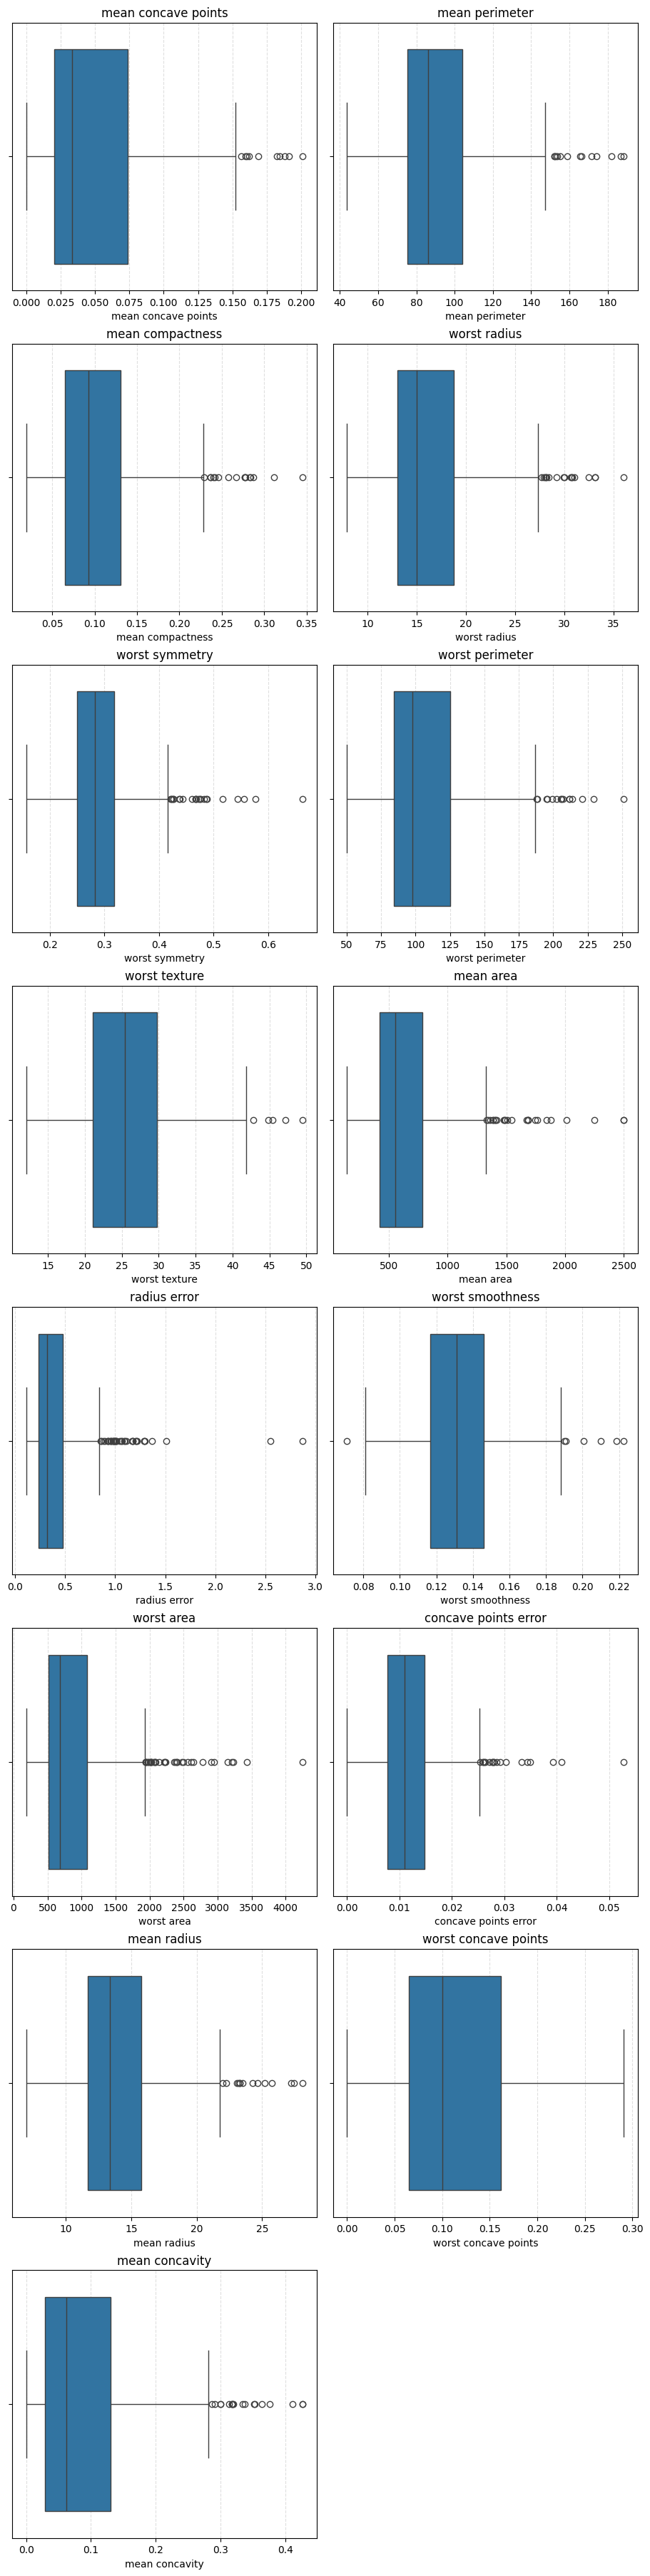

In [9]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que existen en df (por si alguna falta)
cols_num = list(all_candidates)

n = len(cols_num)
n_cols = 2
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4.5, n_rows*4.5), constrained_layout=True)
# Aplanar para indexar con i
axes = axes.ravel() if hasattr(axes, "ravel") else [axes]

for i, col in enumerate(cols_num):
    ax = axes[i]
    sns.boxplot(x=col, data=df, ax=ax)  # horizontal (usa eje X)
    ax.set_title(col)
    ax.grid(True, axis="x", linestyle="--", alpha=0.4)

# Ocultar ejes sobrantes
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.show()


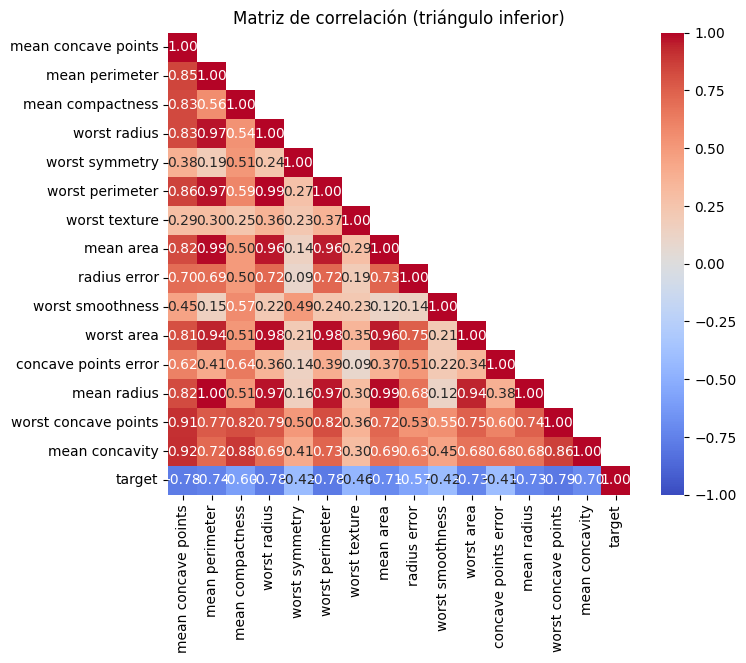

In [10]:
# --- Tu código previo ---
corr_vars   = cols_num + ['target']
corr_matrix = df[corr_vars].corr()

# ====== Mostrar SOLO el triángulo INFERIOR (incluida la diagonal) ======
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)  # oculta el triángulo superior

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, mask=mask,
    annot=True, fmt=".2f",
    cmap="coolwarm", vmin=-1, vmax=1,
    square=True
)
plt.title("Matriz de correlación (triángulo inferior)")
plt.show()


In [13]:
# Grupo redundante
grp = ['worst perimeter', 'worst radius', 'worst area']
pca = PCA(n_components=1, random_state=42)
df['size_index'] = pca.fit_transform(df[grp])[:, 0]
#cols_num = [c for c in cols_num if c not in grp] + ['size_index']

In [11]:
print(df[cols_num].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean concave points   569 non-null    float64
 1   mean perimeter        569 non-null    float64
 2   mean compactness      569 non-null    float64
 3   worst radius          569 non-null    float64
 4   worst symmetry        569 non-null    float64
 5   worst perimeter       569 non-null    float64
 6   worst texture         569 non-null    float64
 7   mean area             569 non-null    float64
 8   radius error          569 non-null    float64
 9   worst smoothness      569 non-null    float64
 10  worst area            569 non-null    float64
 11  concave points error  569 non-null    float64
 12  mean radius           569 non-null    float64
 13  worst concave points  569 non-null    float64
 14  mean concavity        569 non-null    float64
dtypes: float64(15)
memory u

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

preprocess = ColumnTransformer(
    transformers=[("num", StandardScaler(), cols_num)],
    remainder="drop"  # elimina todo lo que no esté en cols_num
)

pipe_lr = Pipeline([
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=500, random_state=RANDOM_STATE))
])

'''pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500, random_state=RANDOM_STATE))
])'''



'pipe_lr = Pipeline([\n    ("scaler", StandardScaler()),\n    ("clf", LogisticRegression(max_iter=500, random_state=RANDOM_STATE))\n])'

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [14]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

cv_lr = cross_validate(pipe_lr, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

def summarize_cv(cvres, label):
    return pd.Series({
        "model": label,
        **{f"{m}_mean": np.mean(cvres[f'test_{m}']) for m in scoring.keys()},
        **{f"{m}_std": np.std(cvres[f'test_{m}']) for m in scoring.keys()},
    })

summary = summarize_cv(cv_lr, "LogisticRegression").T
print(summary)

model             LogisticRegression
accuracy_mean               0.978022
precision_mean              0.979183
recall_mean                 0.985965
f1_mean                     0.982485
roc_auc_mean                 0.99515
accuracy_std                 0.00695
precision_std               0.006544
recall_std                  0.013129
f1_std                      0.005647
roc_auc_std                 0.004792
dtype: object


In [15]:
# Entrenamos
pipe_lr.fit(X_train, y_train)


# Predicciones + probabilidades
y_pred_lr = pipe_lr.predict(X_test)
y_proba_lr = pipe_lr.predict_proba(X_test)[:, 1]


def metrics_row(y_true, y_pred, y_proba, label):
    return pd.Series({
        "model": label,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
        "roc_auc": roc_auc_score(y_true, y_proba),
    })

test_metrics = metrics_row(y_test, y_pred_lr, y_proba_lr, "LogisticRegression").T
test_metrics

model        LogisticRegression
accuracy               0.964912
precision              0.985714
recall                 0.958333
f1                     0.971831
roc_auc                 0.99504
dtype: object

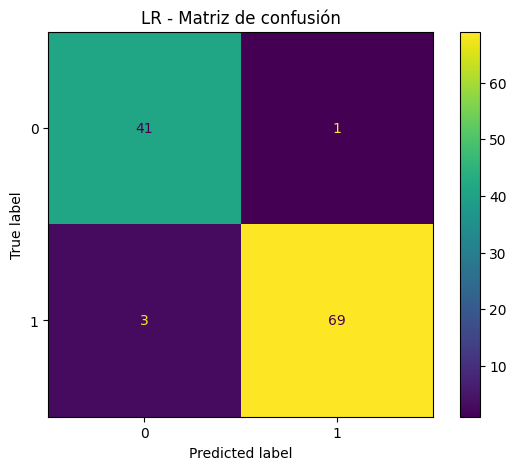

In [16]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot()
plt.title("LR - Matriz de confusión")
plt.show()


In [18]:
# --- extraer objetos ya entrenados ---
pre = pipe_lr.named_steps["preprocess"]     # ColumnTransformer
lr  = pipe_lr.named_steps["clf"]            # LogisticRegression
scaler = pre.named_transformers_["num"]     # StandardScaler (por si lo necesitas)

# --- nombres de features realmente usados por el preprocesador ---
try:
    # sklearn >= 1.0: devuelve nombres tipo "num__feature"
    feat_names = pre.get_feature_names_out()
    feat_names = [f.split("__", 1)[1] if "__" in f else f for f in feat_names]
except Exception:
    # Fallback (aquí vale porque solo escalas numéricas y no expandes columnas)
    feat_names = list(cols_num)

# --- coeficientes ---
coefs = (
    pd.DataFrame({
        "feature": feat_names,
        "coef": lr.coef_.ravel()  # (1, n_features) en binaria
    })
    .assign(abs_coef=lambda d: d["coef"].abs())
    .sort_values("abs_coef", ascending=False)
    .drop(columns="abs_coef")
)

coefs.head(20)


,feature,coef
8,radius error,-1.734303
6,worst texture,-1.524132
13,worst concave points,-1.314105
9,worst smoothness,-1.124027
3,worst radius,-1.050717
10,worst area,-1.023539
2,mean compactness,1.002335
5,worst perimeter,-0.939098
4,worst symmetry,-0.781473
0,mean concave points,-0.780174


In [19]:
param_grid_lr = {
    "clf__C": [0.01, 0.1, 1.0, 10.0],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs", "liblinear"]
}
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=cv, scoring="roc_auc", n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Mejor LR:", grid_lr.best_params_, "AUC:", grid_lr.best_score_)


Mejor LR: {'clf__C': 10.0, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'} AUC: 0.9966976264189886


In [20]:
best_lr = grid_lr.best_estimator_


for label, model in [("Best LR", best_lr)]:
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"\n=== {label} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))


=== Best LR ===
Accuracy: 0.956140350877193
Precision: 0.971830985915493
Recall: 0.9583333333333334
F1: 0.965034965034965
ROC AUC: 0.994047619047619
